# Ejercicio 6
Para simular una variable aletoria con distribución N(mu, sigma) se realizan los siguientes pasos:

1) Se simula primero una variable |Z| donde Z es densidad N(0,1). <br>
2) Luego se multiplica por -1 con probabilidad 0.5 para obtener los valores negativos simetricos. <br>
3) Por último se multiplicará por sigma y se sumará mu. <br>

Se usa fy con distribución EXP(1).

La constante C se calcula de manera teorica y da un valor aproximado de 1.32

Para encontrarla se siguieron los pasos:
<br>
1) Se calcula máximo de fx / fy <br>
   (Al usar fy = EXP(1). El máximo ocurre al maximizar
   el exponente.)
<br>
2) C = fx(maximo) / fy(maximo)


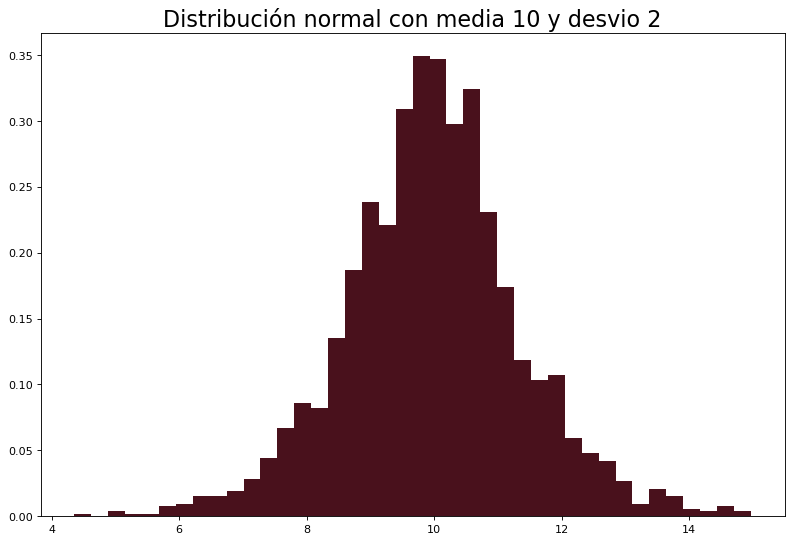

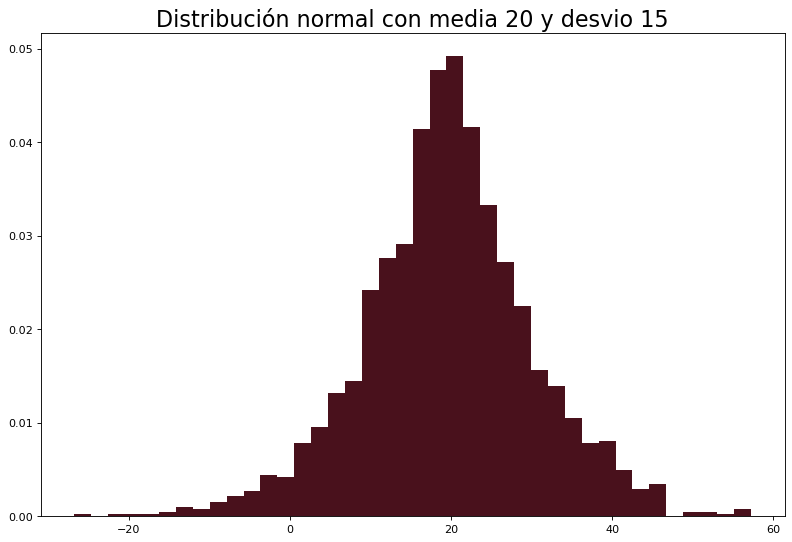

In [1]:
import random
import scipy
import numpy as np
from scipy.stats import norm
from statistics import mean, variance
from math import exp, sqrt, fabs, pi
from matplotlib import pyplot as plt

def normal(x, media=0, desvio=1):
    return norm.pdf(x, loc=media, scale=desvio)

def exponencial(x, lambd=1):
    return lambd * exp(-lambd * x)

def generar_distribucion_normal(media, desvio):
    resultado = []
    for i in range(0, N):
        r1 = random.expovariate(lambd=1)
        fx = normal(x=r1, media=0, desvio=1)
        r2 = random.random()
        if r2 < fx / c:
            signo = 1
            r3 = random.random()
            if r3 >= 0.5:
                signo = -1
            resultado.append(r1 * signo * desvio + media)
    return resultado


N = 10**4
c = 1.32

plt.figure(figsize=(12, 8), dpi=80)
plt.title('Distribución normal con media 10 y desvio 2', size=20)
normal1 = generar_distribucion_normal(media=10, desvio=2)
plt.hist(normal1, bins=40, density=True, color='#49111C')
plt.show()

plt.figure(figsize=(12, 8), dpi=80)
plt.title('Distribución normal con media 20 y desvio 15', size=20)
normal2 = generar_distribucion_normal(media=20, desvio=15)
plt.hist(normal2, bins=40, density=True, color='#49111C')
plt.show()

Calculo media y varianza de las distribuciones obtenidas

In [2]:
normal1_media = mean(normal1)
normal1_varianza = variance(normal1)
normal1_media, normal1_varianza

(9.97668136528348, 1.9028576627946112)

In [3]:
normal2_media = mean(normal2)
normal2_varianza = variance(normal2)
normal2_media, normal2_varianza

(19.60510733866252, 110.07930391583241)

Ahora con estas dos normales vamos a crear una normal bivariada. Para esto primero necesitamos saber, ¿nuestras normales son independientes? Es fácil verificar esto gráficamente: si yo dado un x1 puedo más o menos determinar dónde estará x2, entonces son dependientes

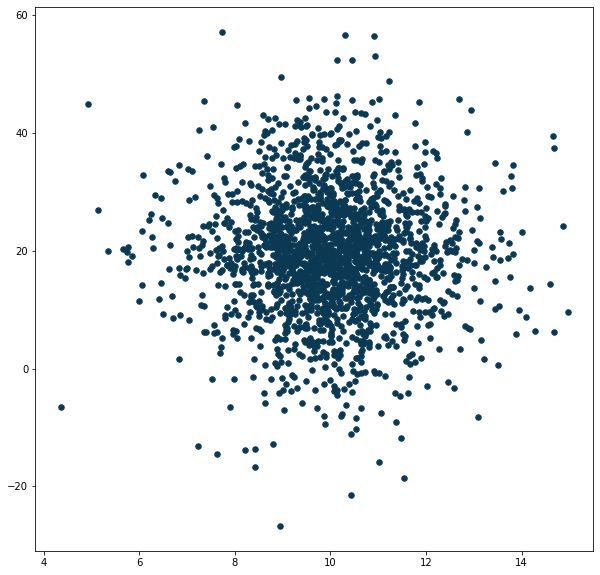

In [4]:
min_len = len(normal1) if len(normal1) <= len(normal2) else len(normal2)

X = normal1[:min_len]
Y = normal2[:min_len]
fig = plt.figure(figsize=(10, 10))
plt.scatter(X, Y, s = 30, color='#0B3954')
plt.show()

Como podemos ver, dado un valor de X, no podemos determinar dónde se situará el valor de Y que le corresponda. Por lo tanto, podemos afirmar que son variables independientes. Siguiendo en ésta línea, podemos graficarlas en 3 dimensiones para ver estos puntos desde otra perspectiva

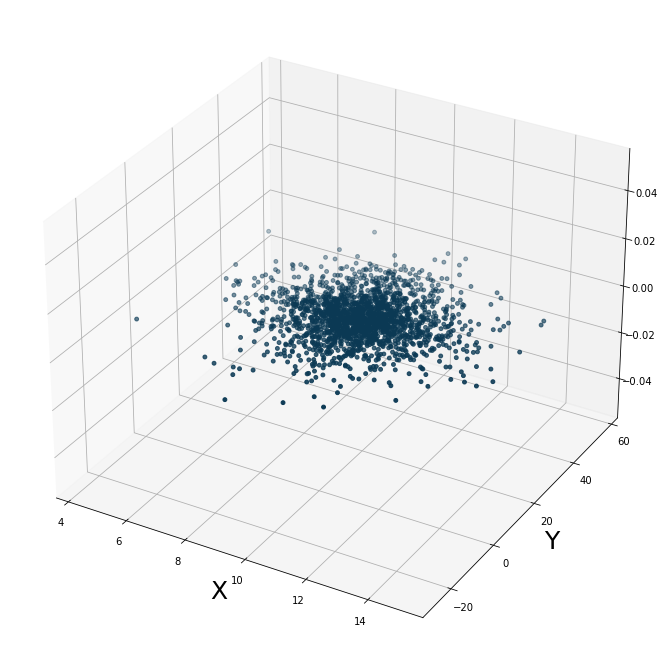

In [5]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, s = 15, color='#0B3954')
ax.set_xlabel('X', size=25)
ax.set_ylabel('Y', size=25)
plt.show()

Ahora calculamos la variable Z: una normal bivariada a partir de X e Y

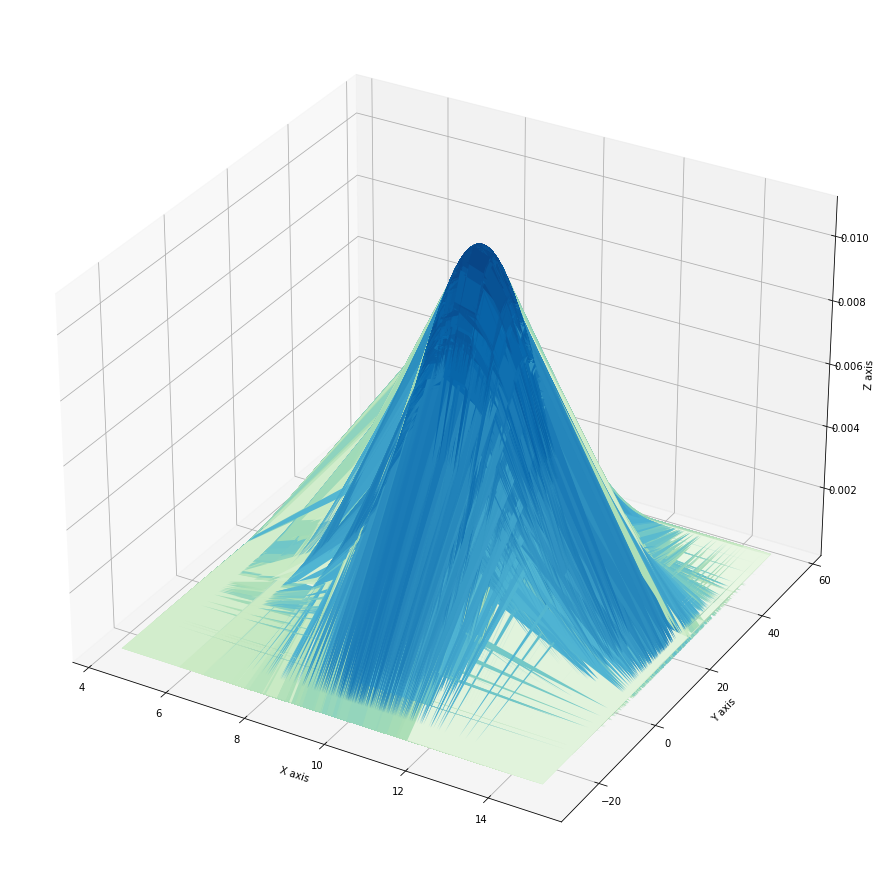

In [14]:
def normal_multivariada(pos, mu, Sigma):

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    
    # Einsum calcula (x-mu)T.Sigma-1.(x-mu) de forma vectorial
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# Transformamos nuestras variables para poder calcular Z y luego graficarla
X_grid, Y_grid = np.meshgrid(X, Y)

# Vector de medias y matriz de covarianza
mu = np.array([normal1_media, normal2_media])
Sigma = np.array([[normal1_varianza, 0], [0, normal2_varianza]])

# Armo un arreglo de 3 dimensiones con el cual calculo Z
pos = np.empty(X_grid.shape + (2,))
pos[:, :, 0] = X_grid
pos[:, :, 1] = Y_grid

Z = normal_multivariada(pos, mu, Sigma)

# Graficamos Z
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z, rstride=3, cstride=3, linewidth=10, antialiased=True, 
                cmap='GnBu')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# Ejercicio 7


Según enunciado se utiliza un nivel de significación de 5%.
El limite de la zona de aceptación/rechazo es 1.65

In [10]:
def kolmogorov_smirnov(muestra):
    k_mayor = 0
    k_menor = 0
    i = 1
    n = len(muestra)
    for x in sorted(muestra):
        valor_teorico = norm.cdf(x, loc=0, scale=1)
        k_mayor = max(k_mayor, fabs(i / n - valor_teorico))
        k_menor = max(k_menor, fabs(valor_teorico - (i -1) / n))
        i += 1

    k_mayor = sqrt(n) * k_mayor
    k_menor = sqrt(n) * k_menor
    k = max(k_mayor, k_menor)

    if  k <= 1.65:
        print ('Acepto')
    else:
        print ('Rechazo')

In [51]:
N = 10**4
muestra1 = generar_distribucion_normal(media=0, desvio=1)
kolmogorov_smirnov(muestra1)

Rechazo


In [52]:
N = 10**3
muestra2 = generar_distribucion_normal(media=0, desvio=1)
kolmogorov_smirnov(muestra2)

Acepto


In [53]:
N = 10**2
muestra3 = generar_distribucion_normal(media=0, desvio=1)
kolmogorov_smirnov(muestra3)

Acepto
